In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [9]:
## Test model
# PATH_TO_GRAPH = r'models/rcnn_resnet101/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'models/rcnn/frozen_inference_graph.pb'
PATH_TO_GRAPH = r'frozen_models/frozen_sim_mobile/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = r'label_map.pbtxt'
NUM_CLASSES = 14

In [10]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [11]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


In [12]:
IMAGE_SIZE = (12, 8)

SCORES
[0.26084292 0.02235836 0.02164897 0.01847165 0.01428806 0.01183047
 0.01104074 0.01080024 0.01062325 0.01039853 0.00991912 0.00972091
 0.00906061 0.00831691 0.00799098 0.00790437 0.00753    0.0069339
 0.00677225 0.00660126 0.00639013 0.00626964 0.00589637 0.00571432
 0.00559686 0.00545577 0.0052756  0.00527345 0.00521745 0.00520191
 0.00493698 0.00475054 0.00462118 0.00460044 0.00447718 0.00433154
 0.00431602 0.00424733 0.00420756 0.0041809  0.00415791 0.00415085
 0.00406223 0.00398713 0.00398439 0.00389567 0.00387439 0.0038026
 0.00377597 0.00372775]
CLASSES
[2. 2. 2. 2. 2. 2. 1. 3. 1. 2. 1. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 3. 2. 1.
 3. 2. 3. 2. 3. 2. 2. 2. 4. 3. 3. 2. 3. 4. 1. 2. 3. 1. 3. 2. 2. 1. 3. 1.
 3. 3.]


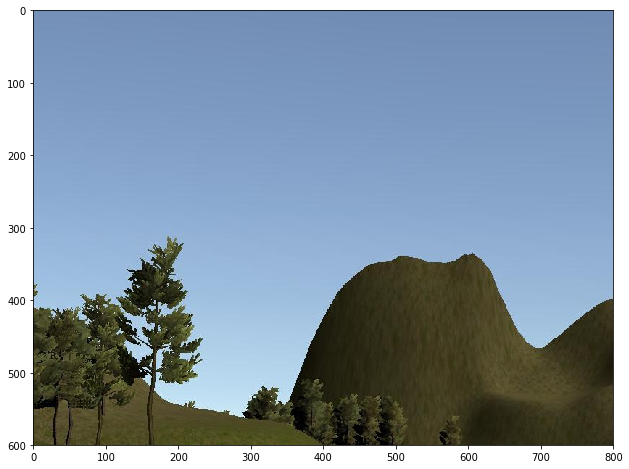

SCORES
[9.9964678e-01 9.3887132e-01 2.0883806e-02 1.3154204e-02 9.6964538e-03
 5.4209493e-03 3.4034178e-03 3.2295729e-03 3.1693410e-03 3.1005691e-03
 3.0454525e-03 3.0435044e-03 2.6181405e-03 2.5782564e-03 2.5058815e-03
 2.2342955e-03 1.9457344e-03 1.8864998e-03 1.7865220e-03 1.7712344e-03
 1.6886169e-03 1.6414212e-03 1.6369022e-03 1.6082589e-03 1.5695833e-03
 1.5459970e-03 1.5011951e-03 1.4892883e-03 1.4707785e-03 1.4438576e-03
 1.2348260e-03 1.2262447e-03 1.2006148e-03 1.1844441e-03 1.1589393e-03
 1.1571506e-03 1.1378061e-03 1.0900871e-03 1.0173324e-03 1.0042752e-03
 9.9752680e-04 9.9582796e-04 9.9196134e-04 9.8016986e-04 9.7959011e-04
 9.6287241e-04 9.5678424e-04 9.4736944e-04 9.4115949e-04 9.3878305e-04]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 2. 2. 2. 1. 2. 3. 4. 2. 2. 2. 2. 1. 3. 2. 2. 2. 4. 2. 2. 2. 1. 2.
 3. 2.]


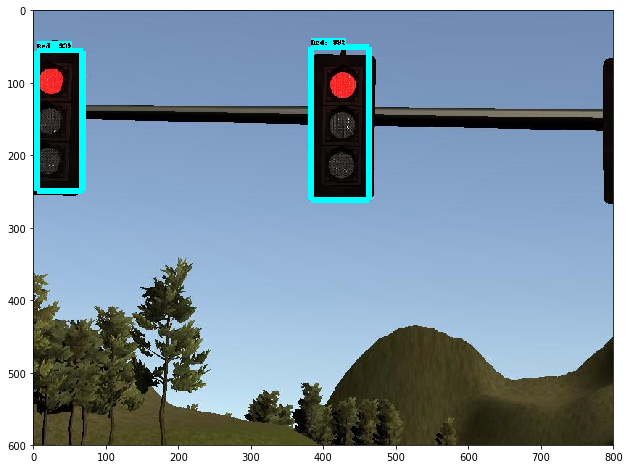

SCORES
[9.9964678e-01 9.3887132e-01 2.0883806e-02 1.3154204e-02 9.6964538e-03
 5.4209493e-03 3.4034178e-03 3.2295729e-03 3.1693410e-03 3.1005691e-03
 3.0454525e-03 3.0435044e-03 2.6181405e-03 2.5782564e-03 2.5058815e-03
 2.2342955e-03 1.9457344e-03 1.8864998e-03 1.7865220e-03 1.7712344e-03
 1.6886169e-03 1.6414212e-03 1.6369022e-03 1.6082589e-03 1.5695833e-03
 1.5459970e-03 1.5011951e-03 1.4892883e-03 1.4707785e-03 1.4438576e-03
 1.2348260e-03 1.2262447e-03 1.2006148e-03 1.1844441e-03 1.1589393e-03
 1.1571506e-03 1.1378061e-03 1.0900871e-03 1.0173324e-03 1.0042752e-03
 9.9752680e-04 9.9582796e-04 9.9196134e-04 9.8016986e-04 9.7959011e-04
 9.6287241e-04 9.5678424e-04 9.4736944e-04 9.4115949e-04 9.3878305e-04]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 2. 2. 2. 1. 2. 3. 4. 2. 2. 2. 2. 1. 3. 2. 2. 2. 4. 2. 2. 2. 1. 2.
 3. 2.]


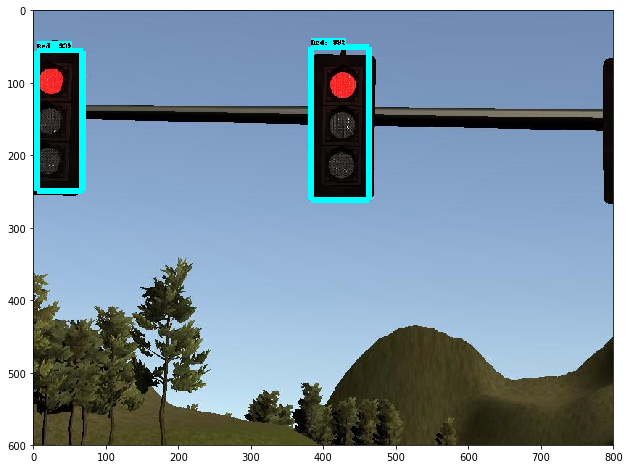

SCORES
[0.9914398  0.98077446 0.9609666  0.13812892 0.01668652 0.01625966
 0.01294667 0.0119511  0.00810165 0.00669594 0.00515656 0.00510924
 0.00406094 0.00384935 0.00366388 0.00360331 0.00351472 0.00314352
 0.00312019 0.00311915 0.00303278 0.00300447 0.00286825 0.00285857
 0.00270829 0.00266692 0.00259273 0.00254293 0.00246277 0.00246151
 0.00245455 0.00234196 0.00233447 0.00230642 0.00212013 0.00210728
 0.00208169 0.00200893 0.00194003 0.00192913 0.00192768 0.00192305
 0.00191359 0.00190743 0.00187357 0.00184491 0.00184397 0.00182885
 0.00179936 0.00172845]
CLASSES
[3. 3. 3. 2. 2. 2. 2. 2. 1. 2. 2. 3. 2. 3. 2. 2. 2. 2. 3. 3. 2. 2. 2. 1.
 3. 3. 2. 3. 2. 4. 2. 4. 2. 2. 2. 2. 3. 1. 3. 3. 3. 3. 3. 3. 2. 3. 2. 1.
 1. 3.]


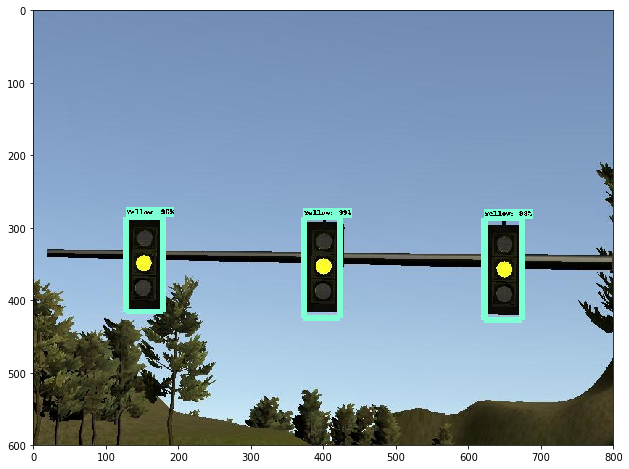

SCORES
[0.97836727 0.94192564 0.7090845  0.0807065  0.05865103 0.05577143
 0.0358885  0.02159477 0.016361   0.01549597 0.01361673 0.01162024
 0.00923704 0.00846974 0.00747417 0.00575554 0.0050406  0.00468373
 0.00453035 0.00438442 0.00414449 0.00412935 0.00404392 0.0039605
 0.00384658 0.00378064 0.00376228 0.00374281 0.00360269 0.00346972
 0.00339829 0.00339568 0.00333054 0.00322945 0.00320767 0.00319566
 0.00318065 0.00315935 0.0031196  0.00308863 0.00307674 0.00306244
 0.0030621  0.00305484 0.00295993 0.0029001  0.0028729  0.00286272
 0.00278502 0.00277831]
CLASSES
[1. 1. 1. 3. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 2.
 2. 3. 2. 3. 3. 1. 2. 1. 4. 3. 2. 2. 2. 3. 4. 2. 3. 2. 2. 2. 1. 2. 3. 2.
 3. 1.]


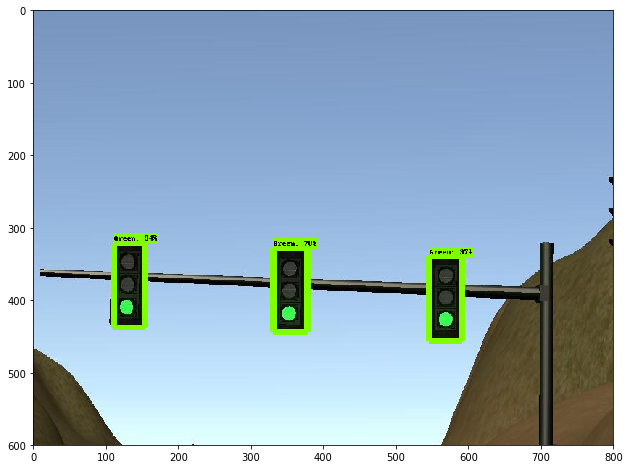

SCORES
[0.98457366 0.98440313 0.14332138 0.11297935 0.01007549 0.0096587
 0.00878104 0.00850649 0.00717692 0.0064651  0.00585826 0.00544285
 0.00473179 0.00446454 0.0044134  0.00432862 0.00419418 0.00396021
 0.00393907 0.00392909 0.00382997 0.0036257  0.00362499 0.00362035
 0.00350062 0.00343301 0.00337282 0.00335669 0.00333884 0.0033074
 0.00319198 0.00317726 0.00315474 0.00310622 0.00305603 0.0028474
 0.00283173 0.00282947 0.00282341 0.00275907 0.00269041 0.00259645
 0.00255896 0.00251057 0.00250839 0.00250564 0.00250043 0.00242669
 0.00238074 0.00236538]
CLASSES
[1. 1. 1. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 3. 3. 3.
 2. 2. 2. 2. 2. 2. 2. 3. 2. 3. 3. 2. 4. 3. 2. 1. 1. 3. 3. 3. 1. 3. 1. 2.
 4. 3.]


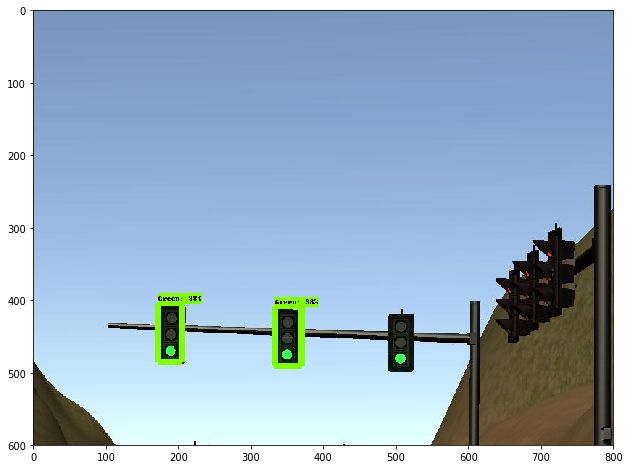

SCORES
[0.9972946  0.75715613 0.44943023 0.30336154 0.02559705 0.02065206
 0.01412344 0.01348808 0.00914366 0.00844189 0.00637832 0.00517436
 0.00437531 0.00433421 0.00398752 0.00308155 0.00296015 0.00282405
 0.00263069 0.00248938 0.00248758 0.00245397 0.00241368 0.00237378
 0.00224596 0.00222564 0.00222048 0.00219052 0.00204706 0.00201477
 0.00200593 0.00199462 0.00194469 0.00186255 0.00169166 0.00168205
 0.00166948 0.00162002 0.00161295 0.00155997 0.00152251 0.00151548
 0.00149624 0.00147556 0.00144879 0.00144065 0.00141426 0.00140624
 0.00140205 0.00140191]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 1. 2. 2. 3. 2.
 2. 3. 1. 2. 2. 3. 2. 1. 4. 2. 3. 2. 3. 1. 3. 2. 3. 3. 2. 3. 2. 3. 2. 2.
 2. 2.]


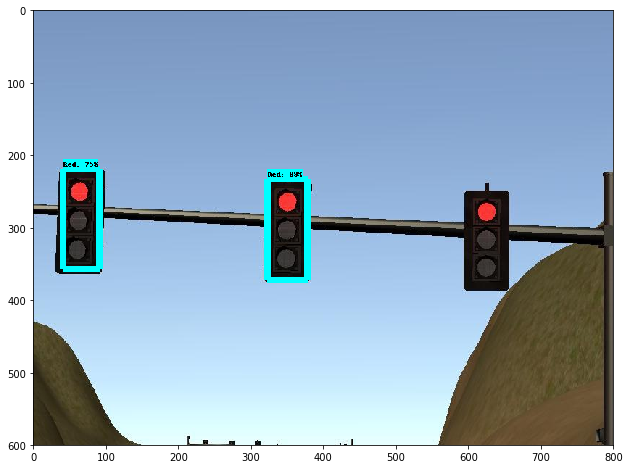

SCORES
[0.9903514  0.9519931  0.94521135 0.01573258 0.01400393 0.01239037
 0.01189666 0.00819445 0.00759796 0.00660022 0.00659847 0.00597817
 0.00424022 0.0022783  0.00223059 0.00203131 0.00199499 0.00188584
 0.00186235 0.00183155 0.00179922 0.00177475 0.00174362 0.001738
 0.00173245 0.00163603 0.00159889 0.00159653 0.0015942  0.00158079
 0.00154008 0.00144681 0.00144332 0.00136568 0.00133244 0.00130808
 0.00129358 0.0012703  0.00125912 0.00125423 0.00125235 0.00124655
 0.00123581 0.00122003 0.00120258 0.00119713 0.00117077 0.00116697
 0.00114946 0.00112308]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 4.
 2. 2. 3. 2. 2. 3. 2. 2. 2. 3. 3. 4. 2. 1. 2. 4. 3. 2. 2. 1. 3. 3. 3. 1.
 2. 4.]


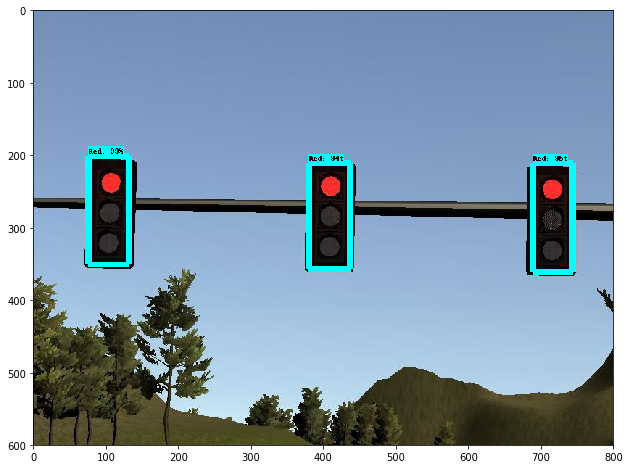

SCORES
[0.99968386 0.49155372 0.10237502 0.03343958 0.02084265 0.01785847
 0.01135381 0.01053188 0.00988616 0.00886239 0.00685525 0.00678438
 0.00630583 0.00539293 0.00537714 0.00519245 0.00503085 0.0039056
 0.00361321 0.00305719 0.00283448 0.00272258 0.00269154 0.00218227
 0.00205759 0.00198066 0.0019613  0.00190132 0.00185884 0.00183246
 0.00174708 0.00166558 0.00160728 0.00158118 0.00155666 0.00155235
 0.00155165 0.00154489 0.00152567 0.00152213 0.00149614 0.00144466
 0.00143306 0.00136511 0.00133423 0.0013226  0.00131989 0.00129142
 0.00129119 0.00126021]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 3.
 3. 1. 2. 2. 4. 2. 2. 3. 2. 3. 2. 2. 3. 2. 2. 2. 4. 2. 4. 2. 2. 1. 3. 2.
 1. 2.]


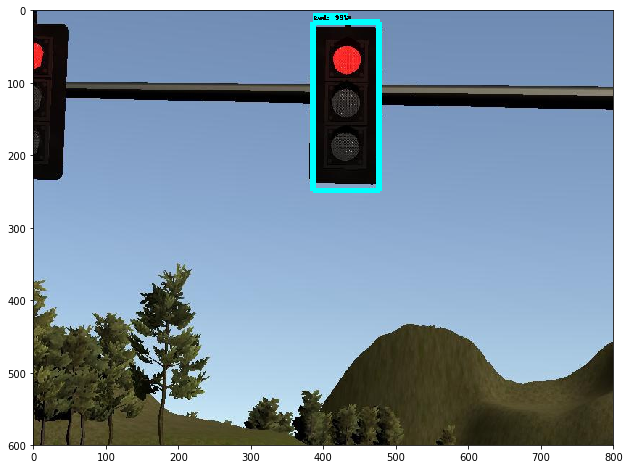

SCORES
[0.9914398  0.98077446 0.9609666  0.13812892 0.01668652 0.01625966
 0.01294667 0.0119511  0.00810165 0.00669594 0.00515656 0.00510924
 0.00406094 0.00384935 0.00366388 0.00360331 0.00351472 0.00314352
 0.00312019 0.00311915 0.00303278 0.00300447 0.00286825 0.00285857
 0.00270829 0.00266692 0.00259273 0.00254293 0.00246277 0.00246151
 0.00245455 0.00234196 0.00233447 0.00230642 0.00212013 0.00210728
 0.00208169 0.00200893 0.00194003 0.00192913 0.00192768 0.00192305
 0.00191359 0.00190743 0.00187357 0.00184491 0.00184397 0.00182885
 0.00179936 0.00172845]
CLASSES
[3. 3. 3. 2. 2. 2. 2. 2. 1. 2. 2. 3. 2. 3. 2. 2. 2. 2. 3. 3. 2. 2. 2. 1.
 3. 3. 2. 3. 2. 4. 2. 4. 2. 2. 2. 2. 3. 1. 3. 3. 3. 3. 3. 3. 2. 3. 2. 1.
 1. 3.]


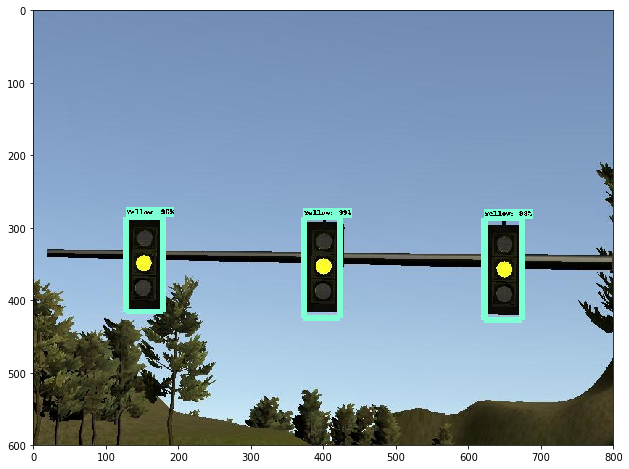

SCORES
[0.9903514  0.9519931  0.94521135 0.01573258 0.01400393 0.01239037
 0.01189666 0.00819445 0.00759796 0.00660022 0.00659847 0.00597817
 0.00424022 0.0022783  0.00223059 0.00203131 0.00199499 0.00188584
 0.00186235 0.00183155 0.00179922 0.00177475 0.00174362 0.001738
 0.00173245 0.00163603 0.00159889 0.00159653 0.0015942  0.00158079
 0.00154008 0.00144681 0.00144332 0.00136568 0.00133244 0.00130808
 0.00129358 0.0012703  0.00125912 0.00125423 0.00125235 0.00124655
 0.00123581 0.00122003 0.00120258 0.00119713 0.00117077 0.00116697
 0.00114946 0.00112308]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 4.
 2. 2. 3. 2. 2. 3. 2. 2. 2. 3. 3. 4. 2. 1. 2. 4. 3. 2. 2. 1. 3. 3. 3. 1.
 2. 4.]


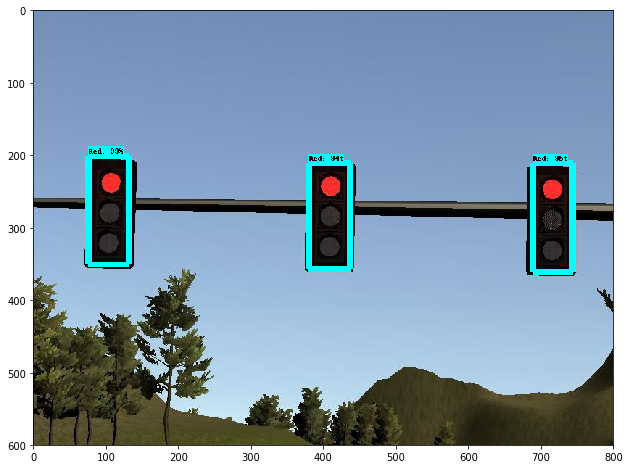

In [13]:
PATH_TO_IMGS = r'test_images_sim'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

SCORES
[0.2615477  0.05795359 0.02362054 0.0178131  0.01185216 0.00972012
 0.00906846 0.00587742 0.00497395 0.00468109 0.0045683  0.00441495
 0.0042784  0.00424174 0.00419646 0.00409375 0.00390767 0.00351589
 0.00349865 0.00342679 0.00333155 0.00332598 0.00329741 0.00326988
 0.00312638 0.00299701 0.00284452 0.0027375  0.00272388 0.00272162
 0.00268203 0.00267908 0.00264123 0.00263704 0.00263132 0.00256849
 0.00256009 0.00255239 0.00246988 0.00245819 0.0023969  0.00237513
 0.00237118 0.0022302  0.00221624 0.00221585 0.00221306 0.00218395
 0.00218204 0.00212213]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3.
 2. 4. 2. 3. 4. 4. 2. 4. 2. 1. 2. 4. 2. 2. 1. 1. 4. 1. 3. 2. 1. 2. 2. 3.
 2. 3.]


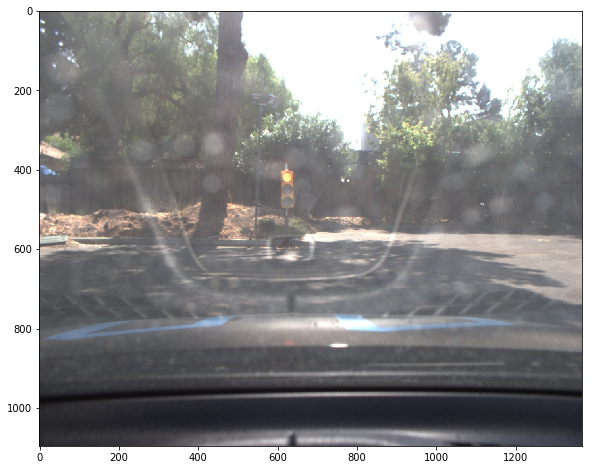

SCORES
[0.47127116 0.13833384 0.08147196 0.03805054 0.03354305 0.0245014
 0.01244154 0.00826408 0.00728289 0.00559606 0.00449142 0.00393224
 0.00385238 0.00381984 0.00371623 0.00368529 0.00367566 0.00354867
 0.00349256 0.00346466 0.0033416  0.0031371  0.00308897 0.00304765
 0.00294658 0.00285674 0.0028382  0.0028134  0.0028114  0.00275597
 0.00270723 0.00268933 0.00266083 0.00245881 0.00245203 0.00238166
 0.00237512 0.00234915 0.00231925 0.00223734 0.00222397 0.00221898
 0.00218807 0.00216896 0.00213379 0.0021242  0.0021173  0.00211094
 0.00209087 0.00208897]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 3. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 4. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 4. 2. 1. 4. 1. 1. 2.
 3. 2.]


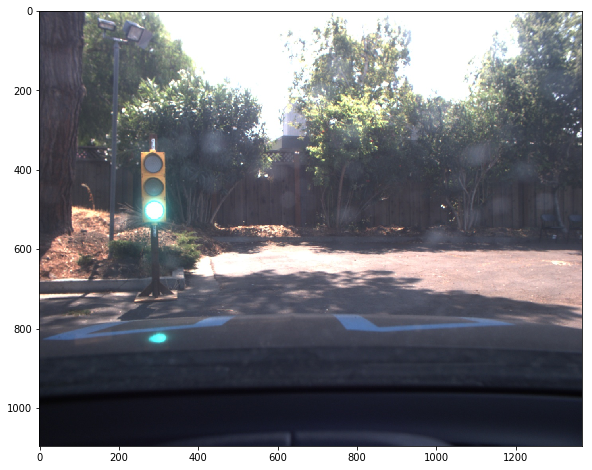

SCORES
[0.2615477  0.05795359 0.02362054 0.0178131  0.01185216 0.00972012
 0.00906846 0.00587742 0.00497395 0.00468109 0.0045683  0.00441495
 0.0042784  0.00424174 0.00419646 0.00409375 0.00390767 0.00351589
 0.00349865 0.00342679 0.00333155 0.00332598 0.00329741 0.00326988
 0.00312638 0.00299701 0.00284452 0.0027375  0.00272388 0.00272162
 0.00268203 0.00267908 0.00264123 0.00263704 0.00263132 0.00256849
 0.00256009 0.00255239 0.00246988 0.00245819 0.0023969  0.00237513
 0.00237118 0.0022302  0.00221624 0.00221585 0.00221306 0.00218395
 0.00218204 0.00212213]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3.
 2. 4. 2. 3. 4. 4. 2. 4. 2. 1. 2. 4. 2. 2. 1. 1. 4. 1. 3. 2. 1. 2. 2. 3.
 2. 3.]


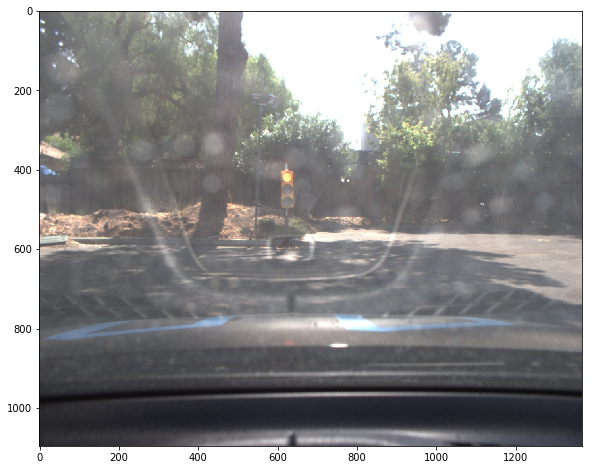

SCORES
[0.2615477  0.05795359 0.02362054 0.0178131  0.01185216 0.00972012
 0.00906846 0.00587742 0.00497395 0.00468109 0.0045683  0.00441495
 0.0042784  0.00424174 0.00419646 0.00409375 0.00390767 0.00351589
 0.00349865 0.00342679 0.00333155 0.00332598 0.00329741 0.00326988
 0.00312638 0.00299701 0.00284452 0.0027375  0.00272388 0.00272162
 0.00268203 0.00267908 0.00264123 0.00263704 0.00263132 0.00256849
 0.00256009 0.00255239 0.00246988 0.00245819 0.0023969  0.00237513
 0.00237118 0.0022302  0.00221624 0.00221585 0.00221306 0.00218395
 0.00218204 0.00212213]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3.
 2. 4. 2. 3. 4. 4. 2. 4. 2. 1. 2. 4. 2. 2. 1. 1. 4. 1. 3. 2. 1. 2. 2. 3.
 2. 3.]


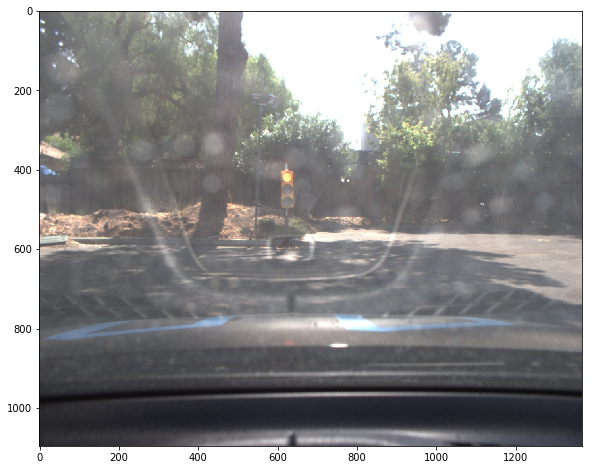

SCORES
[0.47328043 0.16685194 0.06072788 0.03589859 0.0328315  0.02345271
 0.01145039 0.01000971 0.00856509 0.00820045 0.00816479 0.00784355
 0.00738888 0.00656874 0.00597918 0.00468982 0.00414019 0.00406262
 0.00398551 0.00387043 0.00385761 0.00379834 0.00372643 0.0036683
 0.00363821 0.00352005 0.00350707 0.00347944 0.00337457 0.00326326
 0.00322863 0.00313119 0.00306092 0.00299194 0.00271234 0.00267081
 0.00266439 0.00263075 0.00262672 0.00259694 0.00254857 0.00254469
 0.00250935 0.00249572 0.00249253 0.00248002 0.00244325 0.00242509
 0.00239868 0.00238435]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2.
 2. 3. 2. 4. 2. 2. 2. 2. 2. 2. 3. 2. 2. 4. 2. 1. 2. 3. 2. 2. 3. 4. 2. 2.
 1. 3.]


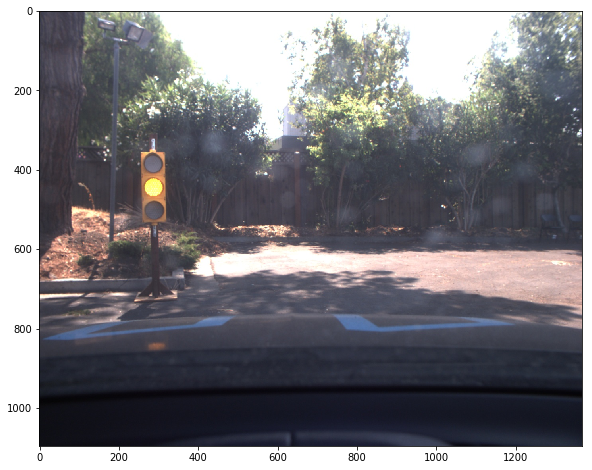

SCORES
[0.47328043 0.16685194 0.06072788 0.03589859 0.0328315  0.02345271
 0.01145039 0.01000971 0.00856509 0.00820045 0.00816479 0.00784355
 0.00738888 0.00656874 0.00597918 0.00468982 0.00414019 0.00406262
 0.00398551 0.00387043 0.00385761 0.00379834 0.00372643 0.0036683
 0.00363821 0.00352005 0.00350707 0.00347944 0.00337457 0.00326326
 0.00322863 0.00313119 0.00306092 0.00299194 0.00271234 0.00267081
 0.00266439 0.00263075 0.00262672 0.00259694 0.00254857 0.00254469
 0.00250935 0.00249572 0.00249253 0.00248002 0.00244325 0.00242509
 0.00239868 0.00238435]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2.
 2. 3. 2. 4. 2. 2. 2. 2. 2. 2. 3. 2. 2. 4. 2. 1. 2. 3. 2. 2. 3. 4. 2. 2.
 1. 3.]


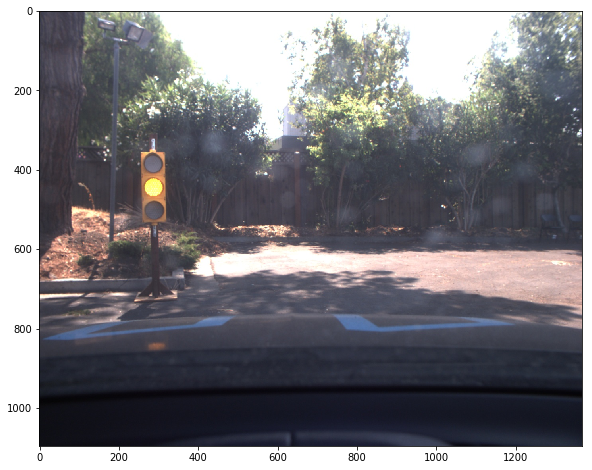

SCORES
[0.07575181 0.07232295 0.03014266 0.02878435 0.02109196 0.01590331
 0.01471623 0.01296113 0.01230179 0.00791741 0.00742716 0.00734829
 0.00691465 0.00669586 0.00545544 0.00527009 0.00522762 0.00424796
 0.00423653 0.00383757 0.00371883 0.00368222 0.00365006 0.0036173
 0.00349118 0.0032749  0.00323419 0.00322637 0.00320423 0.00318707
 0.00315311 0.00312223 0.00308546 0.00303155 0.00300863 0.00285565
 0.00283032 0.00280966 0.00279471 0.00275096 0.00269264 0.00267509
 0.00256679 0.00236567 0.00232907 0.00231957 0.00229771 0.00229408
 0.00228312 0.00221938]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 1. 2. 2. 2.
 4. 1. 2. 4. 2. 3. 2. 1. 2. 2. 1. 1. 4. 4. 2. 2. 1. 2. 4. 2. 1. 2. 2. 4.
 1. 4.]


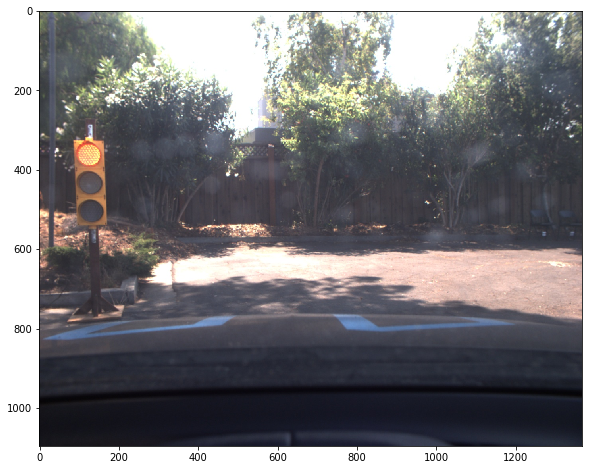

SCORES
[0.47127116 0.13833384 0.08147196 0.03805054 0.03354305 0.0245014
 0.01244154 0.00826408 0.00728289 0.00559606 0.00449142 0.00393224
 0.00385238 0.00381984 0.00371623 0.00368529 0.00367566 0.00354867
 0.00349256 0.00346466 0.0033416  0.0031371  0.00308897 0.00304765
 0.00294658 0.00285674 0.0028382  0.0028134  0.0028114  0.00275597
 0.00270723 0.00268933 0.00266083 0.00245881 0.00245203 0.00238166
 0.00237512 0.00234915 0.00231925 0.00223734 0.00222397 0.00221898
 0.00218807 0.00216896 0.00213379 0.0021242  0.0021173  0.00211094
 0.00209087 0.00208897]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 3. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 4. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 4. 2. 1. 4. 1. 1. 2.
 3. 2.]


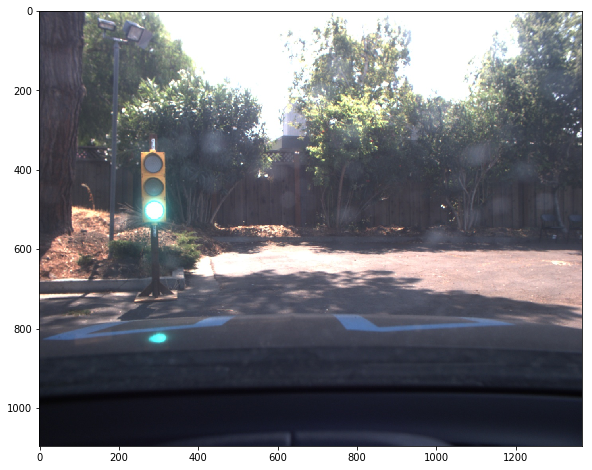

SCORES
[0.2615477  0.05795359 0.02362054 0.0178131  0.01185216 0.00972012
 0.00906846 0.00587742 0.00497395 0.00468109 0.0045683  0.00441495
 0.0042784  0.00424174 0.00419646 0.00409375 0.00390767 0.00351589
 0.00349865 0.00342679 0.00333155 0.00332598 0.00329741 0.00326988
 0.00312638 0.00299701 0.00284452 0.0027375  0.00272388 0.00272162
 0.00268203 0.00267908 0.00264123 0.00263704 0.00263132 0.00256849
 0.00256009 0.00255239 0.00246988 0.00245819 0.0023969  0.00237513
 0.00237118 0.0022302  0.00221624 0.00221585 0.00221306 0.00218395
 0.00218204 0.00212213]
CLASSES
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3.
 2. 4. 2. 3. 4. 4. 2. 4. 2. 1. 2. 4. 2. 2. 1. 1. 4. 1. 3. 2. 1. 2. 2. 3.
 2. 3.]


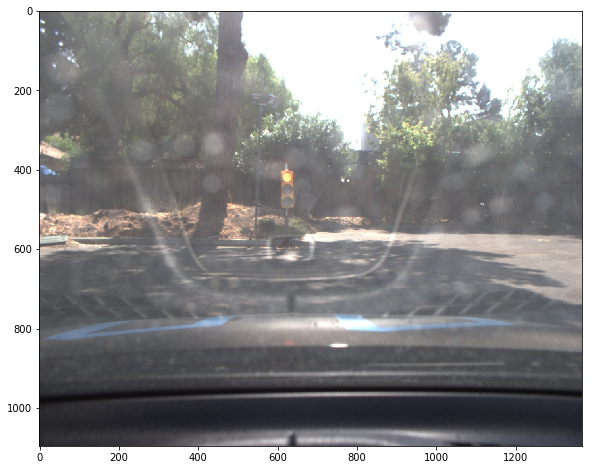

In [14]:
PATH_TO_IMGS = r'test_images_udacity'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break